In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
pd.set_option("Display.max_columns",None)

In [20]:
df = pd.read_excel('data/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows = 20,
    skipfooter = 2 )
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [21]:
cols_to_drop = ['Type','Coverage','AREA','REG','DEV']
df.drop(columns=cols_to_drop, inplace =True)

In [22]:
years= list(range(1980,2014))

In [23]:
df['Total'] = df[years].sum(axis=1)
df.head(3)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [24]:
df.rename(mapper={
    'OdName': 'Country',
    'AreaName': 'Continent',
    'RegName' : 'Region',
    'DevName' : 'Status',
}, axis=1, inplace=True)
df.head(3)

,Country,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


make country index column

In [25]:
df.set_index('Country', inplace=True)
df.head(4)

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6


In [26]:
df.loc['Japan']

Continent                 Asia
Region            Eastern Asia
Status       Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

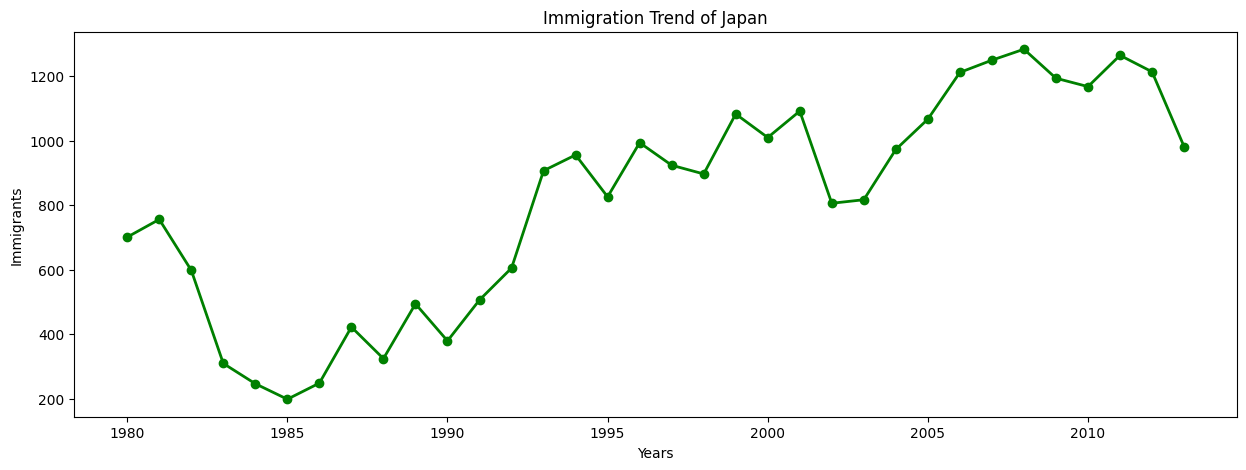

In [28]:
df.loc['Japan' , years].plot(kind='line',title="Immigration Trend of Japan",figsize=(15,5),linewidth=2,color='green',marker='o')
plt.xlabel('Years')
plt.ylabel('Immigrants')
plt.show()

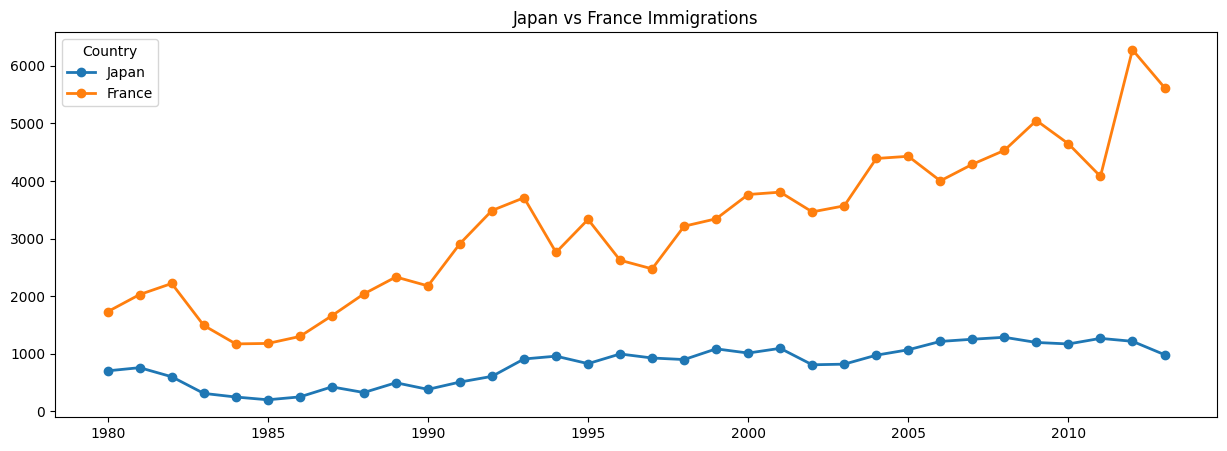

In [29]:
df.loc[['Japan','France'],years].T.plot(kind='line',
title="Japan vs France Immigrations", figsize=(15,5),linewidth=2,marker='o')
plt.show()

In [30]:
continent_df = df.groupby(by='Continent')[years].sum()
continent_df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [31]:
df.groupby(by='Continent')['Total'].sum()

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
Name: Total, dtype: int64

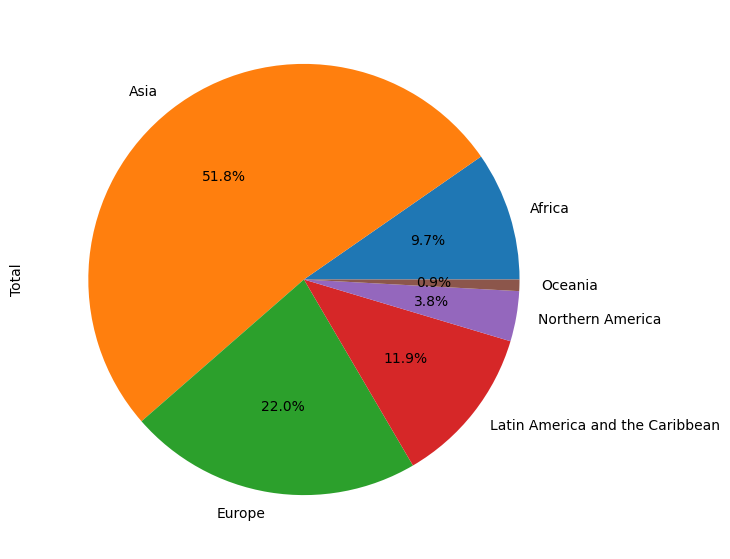

In [32]:
df.groupby(by='Continent')['Total'].sum().plot(kind='pie',
autopct='%1.1f%%',figsize=(7,7))
plt.show()

In [33]:
df.groupby(by='Region')[years].mean()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia and New Zealand,652.000000,559.500000,424.000000,228.500000,240.500000,233.500000,266.000000,337.500000,305.000000,395.000000,445.000000,433.500000,537.500000,619.000000,468.000000,439.000000,459.000000,402.000000,312.500000,343.500000,405.500000,579.500000,534.000000,610.500000,640.000000,639.500000,596.500000,691.500000,749.000000,769.000000,711.500000,613.000000,699.500000,768.000000
Caribbean,541.923077,639.230769,640.461538,538.307692,427.153846,465.230769,670.461538,840.923077,709.923077,829.692308,892.000000,991.307692,1151.923077,1274.538462,764.307692,767.384615,714.846154,624.692308,484.461538,516.461538,544.000000,648.692308,577.461538,500.153846,510.000000,524.307692,511.692308,602.000000,681.692308,680.538462,811.461538,919.846154,915.230769,799.461538
Central America,91.750000,115.125000,201.500000,456.000000,510.875000,607.750000,738.625000,850.500000,699.500000,727.625000,968.750000,1684.250000,1565.125000,971.125000,441.125000,354.500000,423.750000,433.625000,333.125000,358.250000,385.000000,394.625000,376.250000,343.375000,418.250000,498.750000,517.500000,629.875000,611.375000,601.750000,711.500000,727.625000,752.375000,705.500000
Central Asia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,16.200000,17.800000,21.000000,46.000000,145.600000,210.400000,143.400000,123.800000,145.600000,141.200000,165.000000,199.000000,226.800000,180.600000,187.200000,161.000000,192.400000,181.000000,153.800000,205.800000,138.200000
Eastern Africa,86.529412,96.529412,83.882353,64.352941,69.823529,66.705882,85.529412,160.823529,190.411765,240.823529,259.058824,384.411765,572.294118,426.117647,238.000000,257.235294,250.235294,182.000000,179.764706,231.529412,283.823529,286.352941,238.176471,341.647059,454.470588,416.647059,397.058824,392.294118,394.411765,407.176471,505.352941,526.823529,520.352941,555.764706
Eastern Asia,976.571429,1270.714286,783.000000,464.857143,374.857143,425.571429,488.000000,771.857143,841.000000,1113.714286,1506.285714,2480.571429,2179.714286,2077.571429,2441.571429,2675.142857,3381.000000,3645.857143,3877.428571,5523.571429,6378.714286,6794.857143,5799.714286,6412.285714,6221.428571,7186.571429,5966.142857,5084.428571,5657.428571,5356.714286,5422.000000,5022.714286,5778.428571,5791.285714
Eastern Europe,146.700000,369.800000,687.300000,545.900000,443.300000,396.900000,614.400000,886.100000,1149.900000,1867.100000,2024.400000,1975.300000,1751.000000,1420.100000,1129.400000,1198.400000,1332.500000,1408.900000,1397.800000,1467.000000,1652.700000,1884.600000,1861.500000,1711.700000,1836.000000,1672.400000,1438.900000,1388.600000,1198.800000,1175.900000,1180.300000,961.200000,946.400000,1001.100000
Melanesia,158.000000,176.750000,204.000000,139.500000,97.750000,112.000000,90.500000,131.000000,141.000000,184.000000,293.500000,405.250000,447.500000,329.250000,255.250000,168.750000,155.750000,112.000000,97.000000,90.250000,115.500000,161.750000,152.750000,141.750000,124.250000,75.000000,69.500000,76.000000,82.750000,78.250000,100.250000,79.000000,68.250000,58.250000
Micronesia,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.500000,0.250000,0.500000,1.000000,0.500000,1.000000,0.250000,0.500000,0.250000,0.750000,0.250000,0.500000,0.000000,0.000000,0.500000,0.250000


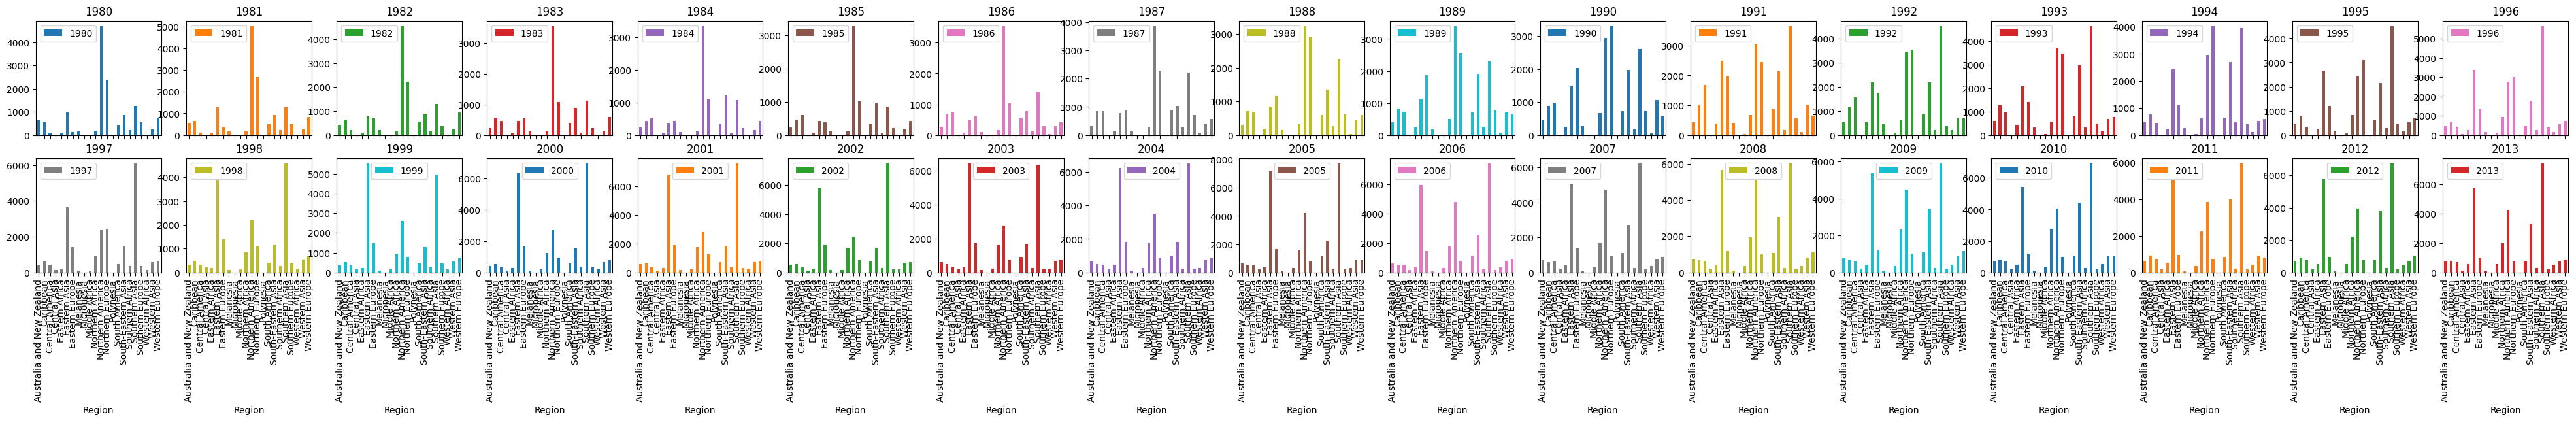

In [34]:
df.groupby(by='Region')[years].mean().plot(kind='bar',
figsize=(50,5),subplots=True,layout=(2,17))
plt.show()

<AxesSubplot: ylabel='Total'>

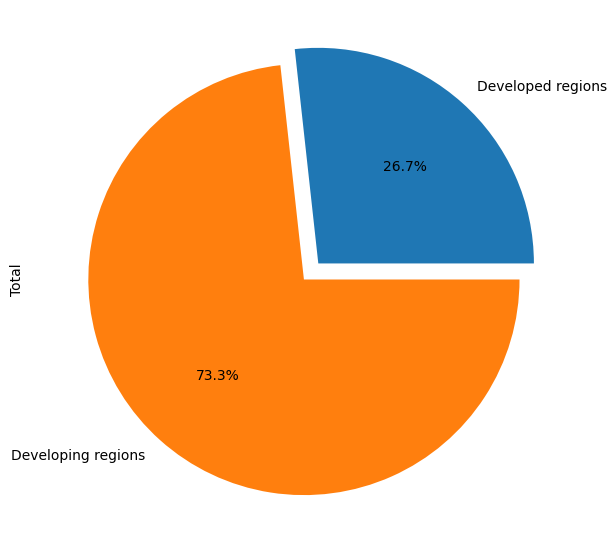

In [35]:
df.groupby('Status')['Total'].sum().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7),explode=[0.1,0])

filter

In [36]:
asiadf = df[df['Continent']=='Asia'].copy()

In [37]:
asiadf.head()

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,22,21,66,75,102,115,89,112,124,87,132,153,147,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,17,18,23,26,38,62,54,77,98,186,167,230,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,2,10,9,6,9,9,11,14,10,17,28,14,27,34,13,17,15,12,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568


In [38]:
asiadf.sort_values(by='Total',ascending=False,inplace=True)

<AxesSubplot: >

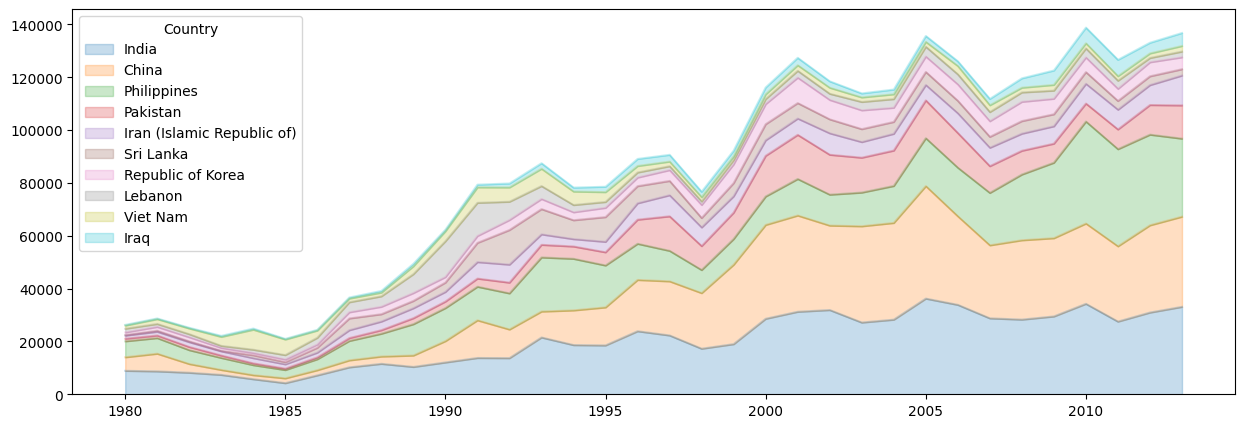

In [39]:
asiadf.head(10)[years].T.plot(kind='area',figsize=(15,5),alpha=0.25)